# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Zakaria Akil:

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
from scipy.stats import norm, chi2, gaussian_kde

In [271]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [272]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [273]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [274]:
regions = list(df.region.unique())

In [275]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [276]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [277]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [278]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

In [279]:
df_region.head()

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859


In [280]:
df_region.head()

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859


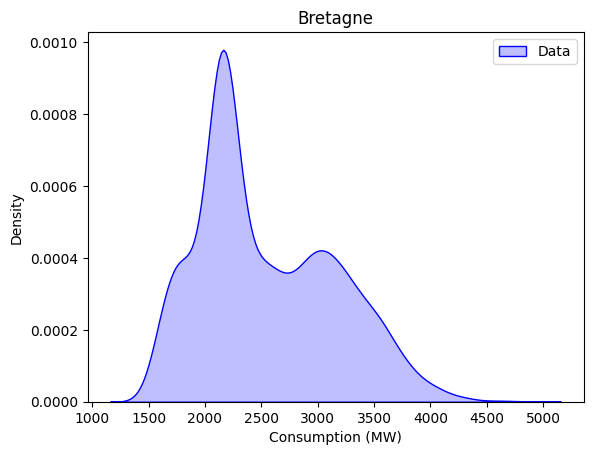

In [281]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

- Pour l'estimateur de moyenne : 
$$
\mathbb E[\hat \mu] = \mathbb E[\frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2}] = \frac 1 n \sum_{i=1}^n \mathbb E[x_i] =  \frac 1 n \sum_{i=1}^n \mathbb \mu = \mu
$$

- Pour l'estimateur de variance : 
$$
\mathbb E[\hat{\sigma^2}] = \frac 1 {n-1}\sum_{i=1}^n \mathbb E[(x_i - \hat \mu)^2] = \frac 1 {n-1}\sum_{i=1}^n \mathbb E[x_i^2 - 2\hat \mu x_i +\hat \mu^2] = \frac 1 {n-1}\sum_{i=1}^n \mathbb E[x_i^2] - 2 \mathbb E[\hat \mu x_i] +\mathbb E[\hat \mu^2]  = \frac 1 {n-1}\sum_{i=1}^n \mathbb Var(x_i)+\mathbb E[x_i]^2 - \frac{2(n-1)}{n} \mu^2 -  \frac{2}{n}\mathbb E[x_i^2] +\mathbb Var(\hat \mu)+\mathbb E[\hat \mu]^2 = \frac 1 {n-1}\sum_{i=1}^n [\frac{n-1}{n}\sigma^2 +(2-\frac{2(n-1)}{n}-\frac{2}{n})\mu^2] 
$$
Donc :
$$
 \mathbb E[\hat{\sigma^2}] = \frac 1 {n-1}\sum_{i=1}^n \frac{n-1}{n}\sigma^2 = \sigma^2
$$
- **Conclusion** : Les deux estimateurs sont des estimateurs sans biais 

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [282]:
def mean_estimator(X):
    mean = 0 
    n=len(X)
    for i in range(n):
        mean += X[i]

    mean /= n    
    return mean

def var_estimator(X):
    mu_hat = mean_estimator(X)
    sigma_sq=0
    n=len(X)
    for i in range(n):
        sigma_sq += (X[i] - mu_hat)**2
    sigma_sq /=(n-1)
    return sigma_sq

def stdv_estimator(X):
    sigma = np.sqrt(var_estimator(X))
    return sigma

In [283]:
print("Pour la region bretagne: --------------------------------------------")
mu=mean_estimator(list(df_region["consumption"]))
var=var_estimator(list(df_region["consumption"]))
stdv=stdv_estimator(list(df_region["consumption"]))
print("mu=", mu)
print("\nVar=", var)
print("\nsigma=", stdv)

Pour la region bretagne: --------------------------------------------
mu= 2546.536155666579

Var= 365956.01414481626

sigma= 604.9429842099305


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [284]:
est_consumption = np.random.normal(mu, stdv, df_region.shape[0])
df_region.loc[:, "estimated_consumption"] = list(est_consumption)
print("Le vecteur des estimations :", est_consumption)


Le vecteur des estimations : [3040.99308211 3033.22662757 2495.07652885 ... 2573.52382611 1206.88312359
 1548.00459193]


C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\542983701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region.loc[:, "estimated_consumption"] = list(est_consumption)


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

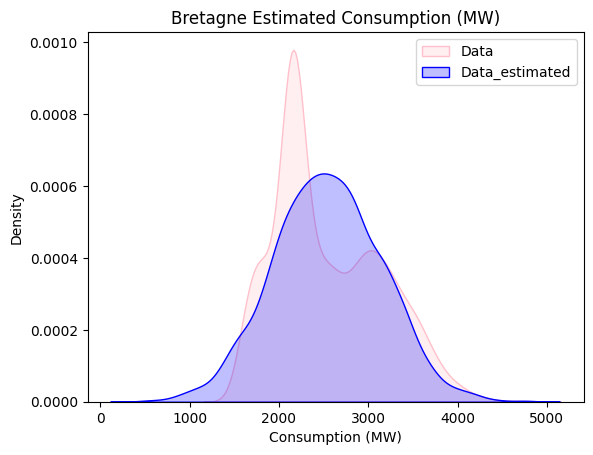

In [285]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='pink', fill=True)
sns.kdeplot(data=df_region, x="estimated_consumption", label="Data_estimated", color='blue', fill=True)

plt.title(region + " Estimated Consumption (MW)")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [286]:
df_region.head()
df_region1=df_region

In [287]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

In [288]:
df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
# mask
mask = ((df_region["date"].dt.month == 12) & (df_region["date"].dt.day >= 22)) | \
       ((df_region["date"].dt.month == 3) & (df_region["date"].dt.day <= 21)) | \
       (df_region["date"].dt.month == 1) | (df_region["date"].dt.month == 2)

# filter
df_region_hivers = df_region[mask]

C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\528059263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")


In [289]:
df_region

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11404,Bretagne,2023-05-27,1761
11405,Bretagne,2023-05-28,1610
11406,Bretagne,2023-05-29,1677
11407,Bretagne,2023-05-30,2057


In [290]:
df_region_hivers

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11333,Bretagne,2023-03-17,2609
11334,Bretagne,2023-03-18,2309
11335,Bretagne,2023-03-19,2206
11336,Bretagne,2023-03-20,2672


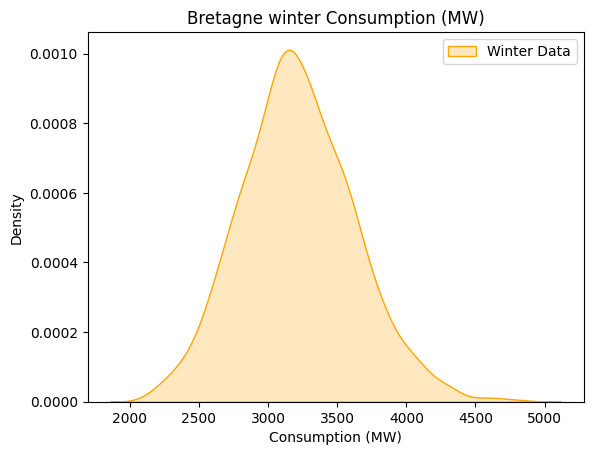

In [291]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region_hivers, x="consumption", label="Winter Data", color='orange', fill=True)

plt.title(region + " winter Consumption (MW)")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

En hiver Pour la region bretagne  : --------------------------------------------
mu= 3214.1782077393077

Var= 167670.9009313411

sigma= 409.4763740819989
-------------------------------------


C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3405720359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_hivers.loc[:, "winter_estimated_consumption"] = list(winter_est_consumption)


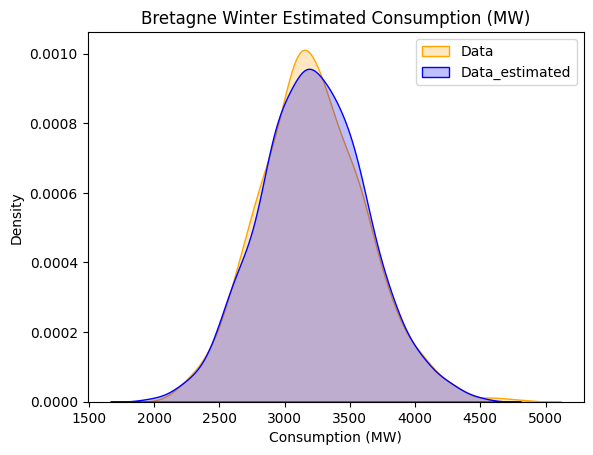

In [292]:
print("En hiver Pour la region bretagne  : --------------------------------------------")
mu=mean_estimator(list(df_region_hivers["consumption"]))
var=var_estimator(list(df_region_hivers["consumption"]))
stdv=stdv_estimator(list(df_region_hivers["consumption"]))
print("mu=", mu)
print("\nVar=", var)
print("\nsigma=", stdv)
print("-------------------------------------")

winter_est_consumption = np.random.normal(mu, stdv, df_region_hivers.shape[0])
df_region_hivers.loc[:, "winter_estimated_consumption"] = list(winter_est_consumption)

# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region_hivers, x="consumption", label="Data", color='orange', fill=True)
sns.kdeplot(data=df_region_hivers, x="winter_estimated_consumption", label="Data_estimated", color='blue', fill=True)

plt.title(region + " Winter Estimated Consumption (MW)")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

- L'hypothese gaussienne est plus appropriée pour **le cas de la consomation en hiver**.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

- On a :
$$
|f(x) - g(x)| \geq 0   
$$
Donc : 
$$
\frac 1 2 \int |f(x) - g(x)| \mathrm dx \geq 0
$$

- Et $$\frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq \frac 1 2 \int |f(x)| + \frac 1 2 \int |g(x)| \mathrm dx \leq \frac 1 2 + \frac 1 2 \leq 1$$
Car f et g sont des probabilités. 
- Conclusion : $$ d(f, g) \in [0, 1] $$


- i) On a :  $x \to |f(x) - g(x)|$ continue et positive alors : $\int |f(x) - g(x)| = 0 \iff  |f - g| = 0 $ presque partout $\iff $ **f=g presque partout**.
- ii) 
    -  (**sens 1**)  Si $Supp(f) \cap Supp(g) = \emptyset$ alors $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = \frac 1 2 \int |f(x)| + \frac 1 2 \int |g(x)|\mathrm dx = 1 $ $\\$
    -  (**sens 2**) On suppose que d(f, g)=1 $\\$
    donc $\frac 1 2 \int_{\mathbb R} |f - g| = \frac 1 2 \int_{\mathbb R} f + \frac 1 2 \int_{\mathbb R} g = 1 $ (**1**) $\\$ 
    et  $\int_{\mathbb R} f = \int_{\mathbb Supp(f)} f$ et $\int_{\mathbb R} g = \int_{\mathbb Supp(g)} g \\$
    Si on pose : $\\$
    $A = (\mathbb Supp(f) ∩ \mathbb Supp(g)) ∪ (\mathbb Supp(f) \setminus \mathbb Supp(g)) ∪ (\mathbb Supp(f) \setminus \mathbb Supp(g))\\$
    Alors : $\mathbb R = A \cup (\mathbb R \setminus A)\\$
    D'ou : 
    $\int_{\mathbb R} |f - g| = \int_{\mathbb R \setminus A} |f - g| + \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} |f - g| + \int_{\mathbb Supp(f) \setminus \mathbb Supp(g)} |f - g| + \int_{\mathbb Supp(f) \setminus \mathbb Supp(g)} |f - g|\\$
    Or : $\\$-
    $\int_{\mathbb R \setminus A} |f - g| = 0 \\$ - 
    $\int_{\mathbb Supp(f) \setminus \mathbb Supp(g)} |f - g| = \int_{\mathbb Supp(f) \setminus \mathbb Supp(g)} f\\$ - 
    $\int_{\mathbb Supp(g) \setminus \mathbb Supp(f)} |f - g| = \int_{\mathbb Supp(g) \setminus \mathbb Supp(f)} g\\$
    donc : (**1**) $ \implies \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} |f - g| + \int_{\mathbb Supp(f) \setminus \mathbb Supp(g)} f + \int_{\mathbb Supp(g) \setminus \mathbb Supp(f)} g = \int_{\mathbb Supp(f)} f + \int_{\mathbb Supp(g)} g \\$
    Et donc on peut dire que  : $ \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} |f - g| = \int_{\mathbb Supp(g)} f + \int_{\mathbb Supp(f)} g \\$
    On sait que : $\int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} |f - g| =  \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} f + \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} g \\$
    donc : $\int_{\mathbb Supp(g)} f - \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} f =  \int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} g - \int_{\mathbb Supp(f)} g \\$
    - Supposons que : $\mathbb Supp(f) ∩ \mathbb Supp(g) ≠ \empty $
    On aura bien sur (d(f, g)=1)(f et g jouent des rols commutatifs): $\mathbb Supp(f) ∩ \mathbb Supp(g) \subset \mathbb Supp(f) \\$
    on aura : $\int_{\mathbb Supp(f) ∩ \mathbb Supp(g)} g - \int_{\mathbb Supp(f)} g < 0 $
    et en meme temps : $\int_{\mathbb Supp(g) ∩ \mathbb Supp(f)} f - \int_{\mathbb Supp(g)} f > 0 \\$
    Alors que les qunatités sont égales !! **ABSURDE** $\\$
    - Donc : $\textcolor{red}{\mathbb Supp(f) ∩ \mathbb Supp(g) = \empty} $

      
 

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [293]:
df_region1

,region,date,consumption,estimated_consumption
7606,Bretagne,2013-01-01,2595,3040.993082
7607,Bretagne,2013-01-02,3195,3033.226628
7608,Bretagne,2013-01-03,3157,2495.076529
7609,Bretagne,2013-01-04,3142,3148.184276
7610,Bretagne,2013-01-05,2859,3371.940161
...,...,...,...,...
11404,Bretagne,2023-05-27,1761,2713.411031
11405,Bretagne,2023-05-28,1610,3218.306951
11406,Bretagne,2023-05-29,1677,2573.523826
11407,Bretagne,2023-05-30,2057,1206.883124


In [294]:
df_region_hivers

,region,date,consumption,winter_estimated_consumption
7606,Bretagne,2013-01-01,2595,2829.882678
7607,Bretagne,2013-01-02,3195,3132.531859
7608,Bretagne,2013-01-03,3157,3087.082601
7609,Bretagne,2013-01-04,3142,3220.330318
7610,Bretagne,2013-01-05,2859,3645.520874
...,...,...,...,...
11333,Bretagne,2023-03-17,2609,3479.568107
11334,Bretagne,2023-03-18,2309,3413.710774
11335,Bretagne,2023-03-19,2206,3749.401471
11336,Bretagne,2023-03-20,2672,2936.906286


In [295]:
def dissimilarity(X, X_hat):
    a = min(min(X), min(X_hat))
    b = max(max(X), max(X_hat))

    g = gaussian_kde(X_hat)
    f = gaussian_kde(X)
    x = np.linspace(a, b, 1000)
    g_x = g(x)
    f_x = f(x)

    d = np.trapz(np.abs(f_x - g_x), x)

    return d


In [296]:
d = dissimilarity(list(df_region1["consumption"]), list(df_region1["estimated_consumption"]))
print("The dissimilarity in the first case is : d=", d)

The dissimilarity in the first case is : d= 0.3308307980205677


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [297]:
d = dissimilarity(list(df_region_hivers["consumption"]), list(df_region_hivers["winter_estimated_consumption"]))
print("The dissimilarity in winter case is : d=", d)

The dissimilarity in winter case is : d= 0.048446315113722396


**Vérification** : Apres examination de dissimilarité, c'est cohérant avec la conclusion de la partie A qui consistait à ce que l'hypthese gaussinne est plus appropriée en hiver.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [298]:
general_dissimilarities=[]
winter_dissimilarities=[]
for region in df["region"].unique():
    df_region=df[df.region == region]

    mu=mean_estimator(list(df_region["consumption"]))
    var=var_estimator(list(df_region["consumption"]))
    stdv=stdv_estimator(list(df_region["consumption"]))

    estimated_consumption = np.random.normal(mu, stdv, df_region.shape[0])
    general_dissimilarities.append(dissimilarity(df_region["consumption"], estimated_consumption))
    ##########
    df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
    # mask
    mask = ((df_region["date"].dt.month == 12) & (df_region["date"].dt.day >= 22)) | \
        ((df_region["date"].dt.month == 3) & (df_region["date"].dt.day <= 21)) | \
        (df_region["date"].dt.month == 1) | (df_region["date"].dt.month == 2)
    df_region_hiver = df_region[mask]


    mu=mean_estimator(list(df_region_hiver["consumption"]))
    var=var_estimator(list(df_region_hiver["consumption"]))
    stdv=stdv_estimator(list(df_region_hiver["consumption"]))


    winter_estimated_consumption = np.random.normal(mu, stdv, df_region_hiver.shape[0])

    winter_dissimilarities.append(dissimilarity(df_region_hiver["consumption"], winter_estimated_consumption))
    
##Creation de la dataframe 
dissimilarities_df = pd.DataFrame({"region":df["region"].unique(),
                                "general_dissimilarity":general_dissimilarities,
                                "winter_dissimilarity": winter_dissimilarities})
dissimilarities_df

C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3029913844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3029913844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3029913844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3029913844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3029913844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3029913844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,region,general_dissimilarity,winter_dissimilarity
0,Auvergne-Rhône-Alpes,0.358235,0.071788
1,Bourgogne-Franche-Comté,0.243013,0.077605
2,Bretagne,0.369766,0.063691
3,Centre-Val de Loire,0.391911,0.055755
4,Grand Est,0.225391,0.086012
5,Hauts-de-France,0.279076,0.080988
6,Normandie,0.327729,0.060377
7,Nouvelle-Aquitaine,0.448830,0.101183
8,Occitanie,0.460268,0.131126
9,Pays de la Loire,0.342665,0.072104


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

- Pour le cas general :

In [299]:
index_min = dissimilarities_df['general_dissimilarity'].idxmin()

region_meilleur_fit = dissimilarities_df.loc[index_min, "region"]

region_meilleur_fit

'Grand Est'

- Pour l'hiver :

In [300]:
index_min = dissimilarities_df['winter_dissimilarity'].idxmin()

region_meilleur_winter_fit = dissimilarities_df.loc[index_min, "region"]

region_meilleur_winter_fit

'Centre-Val de Loire'

- **Remarque** : A chaque nouvelle fois qu'on lance le tirage du vecteur aléatoire, la région avec le minimum de dissimilarité change. C'est normal car toutes les régions ont une dissimilarité dans le meme ordre de grandeur.
- **Résultat** : Après plusieurs tirages, la région avec le meilleur fit avec le modèle gaussien en hiver est : $\textcolor{blue}{\textbf{Bourgogne-Franche-Comté}}$.

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

Pour l'hiver à Bourgogne-Franche-Comté :----------------------------------
mu= 2918.8228105906314

Var= 140400.4945657927

sigma= 374.7005398525504
--------------------------------------


C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3709714074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")
C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\3709714074.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_hivers.loc[:, "winter_estimated_consumption"] = list(winter_est_consumption)


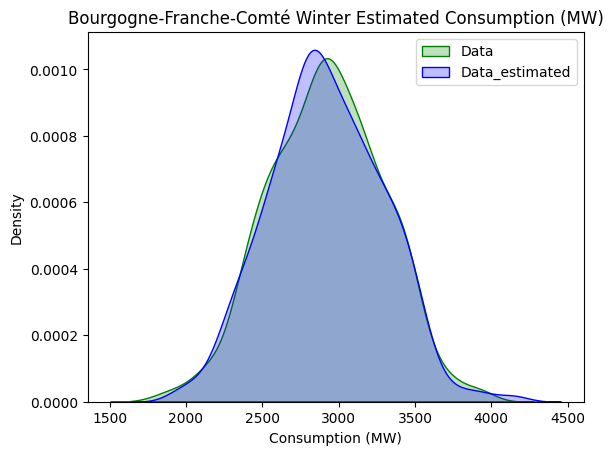

In [301]:
print("Pour l'hiver à Bourgogne-Franche-Comté :----------------------------------")
region="Bourgogne-Franche-Comté"
df_region=df[df.region=="Bourgogne-Franche-Comté"]
df_region["date"] = pd.to_datetime(df_region["date"], format="%Y-%m-%d")

# mask
mask = ((df_region["date"].dt.month == 12) & (df_region["date"].dt.day >= 22)) | \
       ((df_region["date"].dt.month == 3) & (df_region["date"].dt.day <= 21)) | \
       (df_region["date"].dt.month == 1) | (df_region["date"].dt.month == 2)

# filter
df_region_hivers = df_region[mask]

mu=mean_estimator(list(df_region_hivers["consumption"]))
var=var_estimator(list(df_region_hivers["consumption"]))
stdv=stdv_estimator(list(df_region_hivers["consumption"]))

print("mu=", mu)
print("\nVar=", var)
print("\nsigma=", stdv)
print("--------------------------------------")

winter_est_consumption = np.random.normal(mu, stdv, df_region_hivers.shape[0])
df_region_hivers.loc[:, "winter_estimated_consumption"] = list(winter_est_consumption)

# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region_hivers, x="consumption", label="Data", color='green', fill=True)
sns.kdeplot(data=df_region_hivers, x="winter_estimated_consumption", label="Data_estimated", color='blue', fill=True)

plt.title(region + " Winter Estimated Consumption (MW)")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $ \sigma =400 MW$ . Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500MW$ et l'écart-type $\sigma_0=500MW$.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

- On adopte une modelisation beyesienne pour ce probleme. Notre parametre est $\theta=\mu$.
- On prend, d'apres les données : 
$$
\mu \sim \mathcal{N}(\mu_0, \sigma_0^2) \\  X|\mu \sim \mathcal{N}(\mu, \sigma^2)
$$
- La loi a posteriori est définie comme suit : 
$$
\pi(\mu|X) = \frac{p_{\mu}(X).\pi (\mu)}{m(X)} \hspace{1mm} \\ \alpha \hspace{1mm} p_{\mu}(X).\pi (\mu)
$$
avec : 
$$
\pi(\mu) = \frac{1}{\sigma_0 \sqrt{2\pi}} \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right) \\
p_{\mu}(X=(x_1, \ldots, x_n)) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{\sum(x_i - \mu)^2}{2\sigma^2}\right)
$$
Vu que les échantillons sont iid. 
- Tout calcul fait on trouve que la loi a posteriori est également une **distribution normale**, et les paramètres sont les suivants :

    * Moyenne : $\textcolor{blue}{\mu_{\text{post}} = \frac{\frac{\sum_{i=1}^{n}x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}}$

    * Variance : $\textcolor{red}{\sigma_{\text{post}}^2 = \left(\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}\right)^{-1}}$

$$\pi(\mu|X) \sim \mathcal{N}(\mu_{post}, \sigma_{post}^2)$$


2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

- **Remarque** : Vu l'ambiguité rencontré, j'ai choisi de considerer un hiver de l'année n, la période de 01 janvier n à 21 Mars n, et la période [22, 31] decembre n. 

In [302]:
#Calcul des parametre de la loi obtenue
def moyenne(X, sigma=400, mu0=3500, sigma0=500):
    n= len(X)
    mu = (sum(X)/(sigma**2) + mu0/(sigma0**2))/(n/(sigma**2) + 1/(sigma0**2))
    return mu

def variance(n, sigma=400, sigma0=500):
    return 1/(n/(sigma**2) + 1/(sigma0**2))

In [303]:
df_bretagne = df[df.region=="Bretagne"]
df_bretagne["date"] = pd.to_datetime(df_bretagne["date"], format="%Y-%m-%d")
# mask
mask = ((df_bretagne["date"].dt.month == 12) & (df_bretagne["date"].dt.day >= 22)) | \
       ((df_bretagne["date"].dt.month == 3) & (df_bretagne["date"].dt.day <= 21)) | \
       (df_bretagne["date"].dt.month == 1) | (df_bretagne["date"].dt.month == 2)

# filter
df_bretagne_hiver = df_bretagne[mask]

years_list = range (2013, 2024)
moyennes =[]
variances = []

for year in years_list:
    df_bretagne_winter_per_year = df_bretagne_hiver[df_bretagne_hiver.date.dt.year==year]
    echantillons = df_bretagne_winter_per_year["consumption"]
    moyennes.append(moyenne(echantillons))
    variances.append(variance(len(echantillons)))

loi_a_posteriori_bretagne = pd.DataFrame({
    "Year": years_list,
    "Moyenne": moyennes,
    "Variance": variances
})
loi_a_posteriori_bretagne

C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\1370785655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bretagne["date"] = pd.to_datetime(df_bretagne["date"], format="%Y-%m-%d")


,Year,Moyenne,Variance
0,2013,3343.413504,1765.225066
1,2014,3118.424537,1765.225066
2,2015,3167.398500,1765.225066
3,2016,3207.507639,1745.962462
4,2017,3251.224625,1765.225066
5,2018,3315.081642,1765.225066
6,2019,3195.200794,1765.225066
7,2020,3145.504147,1745.962462
8,2021,3341.946161,1765.225066
9,2022,3165.081642,1765.225066


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

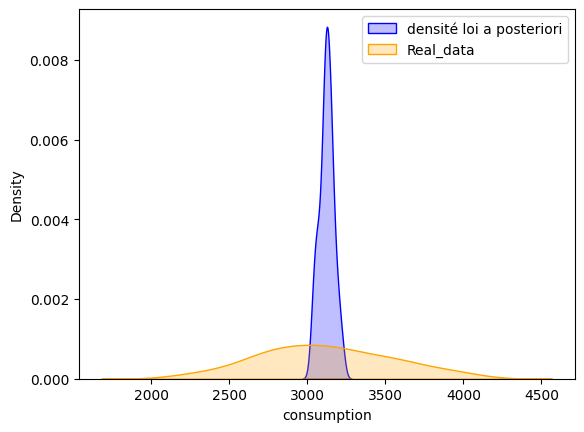

In [304]:
mu_2023 = loi_a_posteriori_bretagne[loi_a_posteriori_bretagne.Year ==2023]["Moyenne"]
var_2023 = loi_a_posteriori_bretagne[loi_a_posteriori_bretagne.Year ==2023]["Variance"]
loi_2023 = np.random.normal(mu_2023, np.sqrt(var_2023), len(df_bretagne_hiver[df_bretagne_hiver.date.dt.year == 2023]))

sns.kdeplot(data=loi_2023, label="densité loi a posteriori", color='blue', fill=True)
sns.kdeplot(data= df_bretagne_hiver[df_bretagne_hiver.date.dt.year == 2023], x= "consumption", label="Real_data", color='orange', fill=True)
plt.legend()
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :
- **Réponse** : Remarquons que la densité de la loi a posteriori donne bien une idée sur la valeur de la moyenne de la densité des données réelles, car dans le modèle bayésien que l'on a adopté le paramètre était la valeur moyenne $\mu$ et la loi a posteriori est la loi de cette moyenne et pas des consommations. Alors que pour l'estimation ponctuelle on avait une densité très proche de celle des valeurs réelles car le but était d'estimer les consomations directement.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :
Nous souhaitons tester si l'ecart-type $\sigma = \sigma_0 = 400 MW$ pour les echantillons de l'hiver de 2023. Alors que les echantillons en hiver suivent la loi normale : $ \sim \mathcal{N}(\mu, \sigma_1^2)\\$
avec : $\mu = 3200 MW$ et $\sigma_1 = 500 MW \\$
Donc on peut modéliser notre probleme comme :
- $\textcolor{blue}{\mathbb H0 : \{\sigma = \sigma_0\}}$    $\textbf{VS}$   $\textcolor{red}{\mathbb H1 : \{\sigma = \sigma_1\}}$
Le rapport de vraisemblance est : $$Z(X) = \frac{p_{\sigma_1(X)}}{p_{\sigma_0(X)}} = \frac{\sigma_0}{\sigma_1}\exp{-\frac{\sum{(x_i - \mu)^2}}{2.\frac{\sigma_1\sigma_0}{\sigma_0 - \sigma_1}}}$$
- On pose la statistique : $$S(X) =\sum{(x_i - \mu)^2}$$ 
- D'apres le thm de Neymann Pearson, le test suivant est un test UPP de niveau $\alpha$: $$\delta^* (X) =  \mathbb 1_{\{Z(X) > c\}}$$ 
Avec : $\mathbb P_{\sigma_0}(Z(X)>c) = \alpha$

- Z(X) est croissance par rapport à S(X) puisque $\sigma_1 > \sigma_0$, donc : $$\mathbb P_{\sigma_0}(S(X)>c') = \alpha$$
et le test correspondant est : $$\delta^* (X) =  \mathbb 1_{\{S(X) > c'\}}$$

- Or, on peut remarquer que : $$ \frac{S(X)}{\sigma^2} \sim \chi^2(n)$$
Car les $x_i$ sont i.i.d suivant la loi normale de moyenne $\mu$ et de variance $\sigma \\$

- $$\alpha = \mathbb P_{\sigma_0}(S(X)>c') =\mathbb P_{\sigma_0}(\frac{S(X)}{\sigma_0^2}>\frac{c'}{\sigma_0^2}) $$
Donc on prend : $$\frac{c'}{\sigma_0^2} = q^{\chi^2_n} _{1-\alpha} \implies c' = \sigma_0^2 q^{\chi^2_n} _{1- \alpha}$$

- Conclusion : On a le test statistique de quantile : $$  \textcolor{blue}{c' =\sigma_0^2 q^{\chi^2_n} _{1- \alpha}}$$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [305]:
df_bretagne_winter_per_year

,region,date,consumption
11258,Bretagne,2023-01-01,2306
11259,Bretagne,2023-01-02,2702
11260,Bretagne,2023-01-03,3049
11261,Bretagne,2023-01-04,2904
11262,Bretagne,2023-01-05,2833
...,...,...,...
11333,Bretagne,2023-03-17,2609
11334,Bretagne,2023-03-18,2309
11335,Bretagne,2023-03-19,2206
11336,Bretagne,2023-03-20,2672


In [306]:
#Nos echantillons sont les consommations en hiver de 2023 
echantillons = list(df_bretagne_winter_per_year["consumption"])
#les données
sigma_0 = 400
sigma_1 = 500
mu = 3200

#Les deux params de la quantile
alpha = 0.01
degre = len(echantillons)
quantile = chi2.ppf(1-alpha, degre)*sigma_0**2
print(f"Le quantile correspondant à alpha = 0.01 est {quantile}")



Le quantile correspondant à alpha = 0.01 est 17972606.803247597


In [307]:
#Maintenant on va voir le resultat du test :

#Calculons la statistique de test 
S = sum([(x-mu)**2 for x in echantillons])

def delta(S):
    return "H0 acceptée" if S<quantile else "H0 rejetée"

print(delta(S))



H0 acceptée


- L'hypothese H0 a été acceptée. Donc l'ecart type en hiver 2023 est égale à **400 MW**

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

In [308]:
df_PACA_hivers= df[df.region == "Provence-Alpes-Côte d'Azur"]
df_PACA_hivers["date"] = pd.to_datetime(df_PACA_hivers["date"], format="%Y-%m-%d")
# mask
mask = ((df_PACA_hivers["date"].dt.month == 12) & (df_PACA_hivers["date"].dt.day >= 22)) | \
       ((df_PACA_hivers["date"].dt.month == 3) & (df_PACA_hivers["date"].dt.day <= 21)) | \
       (df_PACA_hivers["date"].dt.month == 1) | (df_PACA_hivers["date"].dt.month == 2)

# filter
df_PACA_hivers = df_PACA_hivers[mask]

bretagne_consumption = list(df_bretagne_hiver["consumption"])
PACA_consumption = list(df_PACA_hivers["consumption"])

data = pd.DataFrame({"Bretagne": bretagne_consumption,
                      "Provence-Alpes-Côte d'Azur": PACA_consumption})


C:\Users\akilh\AppData\Local\Temp\ipykernel_9044\2906171304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PACA_hivers["date"] = pd.to_datetime(df_PACA_hivers["date"], format="%Y-%m-%d")


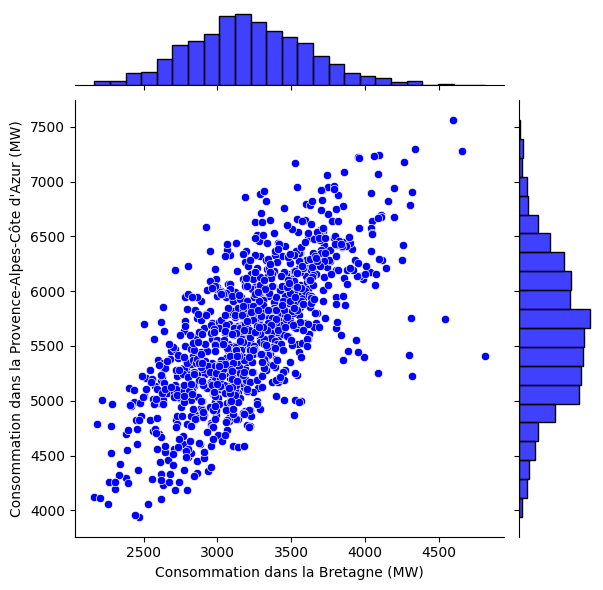

In [309]:
sns.jointplot(x="Bretagne", y="Provence-Alpes-Côte d'Azur", data=data, color="blue")

plt.xlabel('Consommation dans la Bretagne (MW)')
plt.ylabel("Consommation dans la Provence-Alpes-Côte d'Azur (MW)")
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse : **Non**, on remarque qu'il y a un relation entre X et Y, les echantillons forment une eclipse qui peut être approximée a une droite. 

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse :
- Soient X, Y les deux variables aleatoires modelisant  les consomations en hiver successivement dans la Bretagne et dans la province Alpes.
- On prend $A_x = \{x_1, \dots , x_{N_x}\}$ de cardinal $N_x$ l'ensemble de valeurs prises par X et $A_y = \{y_1, \dots , y_{N_y}\}$ de cardinal $N_y$ l'ensemble de valeurs prises par Y.
- Soit n le nombre d'échantillons.
- on peut modéliser notre probleme comme : $\textcolor{blue}{\mathbb H0 : \{X\ et\ Y\ sont\ indépendants\}}$    $\textbf{VS}$   $\textcolor{red}{\mathbb H1 : \{X\ et\ Y\ ne\ sont\ pas\ indépendants\}}$
- On a : pour i, j : $$ N(i, j)  = \sum\limits_{t=1}^{n^2} \mathbb 1_{\{(X,Y)_t=(x_i, y_j)\}}$$
- On trouve l'esperance de de N(i,j) : $$\mathbb E[N(i,j)]= n^2 p^X_i p^Y_j,\ avec\ p^X_i = \mathbb P(X= x_i)\ et\ p^Y_j  = \mathbb P(Y= y_i)$$
- On pose : $$T(X,Y) = \sum\limits_{i=1}^{N_x}\sum\limits_{i=1}^{N_y} \frac{(N(i,j) - n^2 p^X_i p^Y_j )^2}{n^2 p^X_i p^Y_j} =\ \textcolor{red}{\sum\limits_{i=1}^{N_x}\sum\limits_{i=1}^{N_y}\frac{(N(i,j) - \frac{N_iN_j}{n})^2}{\frac{N_iN_j}{n}}},$$
- Pour un nombre d'échantillon n suffisament grand : $$T(X,Y) \sim \chi^2((N_x-1)(N_y -1))$$
- La fonction de décision minimisant le risque est donc : $$\textcolor{blue}{\delta^* (X,Y) = \mathbb 1_{\{T(X,Y) > q^{\chi^2(K)}(1-\alpha)\}}},\ avec\ K = (N_x-1)(N_y -1)$$


4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [310]:
def denombrement(liste):
    valeurs_uniques = []
    occurances = {}
    for valeur in liste:
        if valeur not in valeurs_uniques:
            valeurs_uniques.append(valeur)
            occurances[valeur] = 1
        else:
            occurances[valeur] += 1
    return len(valeurs_uniques), occurances

####Nos parametres 

alpha = 0.01
Nx, pX= denombrement(bretagne_consumption)
Ny, pY= denombrement(PACA_consumption)
K = (Nx-1)*(Ny-1)
n=len(bretagne_consumption)

#Calculons T(X,Y)
T = 0 
for xi, Nxi in pX.items():
    for yj, Nyj in pY.items():
        T += ((Nxi*Nyj - Nxi*Nyj/n )**2)/(Nxi*Nyj/n)

#calculons le quantile

quantile = chi2.ppf(1-alpha, K)
#decision

decision = "H0 est vérifiée : X et Y sont indépendant" if T <= quantile else "H0 rejetée : X et Y ne sont pas indépendant"
print(decision)


H0 rejetée : X et Y ne sont pas indépendant


**Conclusion :**  $ \textcolor{blue}{H0\ rejetée\ :\ X\ et\ Y\ ne\ sont\ pas\ indépendants,\ ce\ qui\ était\ attendu\ !}$

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

- Il s'agit d'un problème de deux paramètres:  $ \theta = (\mu, \sigma^2)$, on va donc adopter une distribution de student pour trouver un intervalle [m, M] de confiance. **Il est indispensable donc d'importer la classe t de scipy.stats**

- On a : $$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$
 On va estimer la variance avec l'estimateur non biaisé suivant : $$ V_0 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$
 On prend : $$Z = \phi(X) = \frac{\bar{X} - \mu}{\sqrt{\frac{V_0}{n}}}$$
 On a donc : $$Z\ \sim \textbf{T}_{n-1}$$
 L'intervalle de confiance à un niveau $\alpha$ est défini comme suit : $$ \delta(X) = \{\mu / \phi_{\theta}(X) \in A\}, avec\ A= [-c, c],\ et\ 1-\alpha = \mathbb P(\phi(X) \in A)$$
 En utilisant le quantile de la distribution de student on trouve que : $$ \textcolor{blue}{c = q^{\textbf{t}_{n-1}}_{\frac{1+\alpha}{2}}} $$
- Notre intervalle est donc : $$ \delta(X) = \{\textcolor{blue}{\mu}\ /\ \bar{X} - c.\sqrt{\frac{V_0}{n}} \leq \textcolor{blue}{\mu} \leq\ \bar{X} + c.\sqrt{\frac{V_0}{n}}\} $$


In [311]:
from scipy.stats import t
def mean_estimator(X):
    n = len(X)
    return sum(X) / n

def Var_estimator(X):
    n = len(X)
    V = 0
    X_barre = mean_estimator(X)
    for i in range(n):
        V += (X[i] - X_barre) ** 2
    V = V / (n - 1)
    return V

X = list(df_bretagne_hiver["consumption"])
n= len(X)
X_barre = mean_estimator(X)
V0 = Var_estimator(X)

alpha = 0.95
#calculons le quantile de la distribution de student.
quantile = t.ppf(1/2 + alpha/2, n-1)
#L'intervalle est de la forme [m, M]

m, M = X_barre - quantile*np.sqrt(V0)/np.sqrt(n), X_barre + quantile*np.sqrt(V0)/np.sqrt(n)

print(f"L'intervalle de confiance a un niveau alpha = 95% est : [{m},{M}]")

L'intervalle de confiance a un niveau alpha = 95% est : [3188.5358856463263,3239.820529832289]


**conclusion :** L'intervalle de confiance a un niveau $\alpha$ = 95% est : $\textcolor{blue}{[3188.5358856463263,\ 3239.820529832289]}$

2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

- Le test de student pour un niveau $\alpha$ est le test d'hypothese correspondant à l'intervalle de confiance pour un niveau de $1 - \alpha$. Donc on prend les données de l'hiver 2023 comme notre vecteur X, et on genere de la meme façon l'intervalle de confiance, et le test sera de verifier si $\mu = 3100MW$ appartient à notre intervalle.

In [312]:
mu_2023 = 3100

X= list(df_bretagne_winter_per_year["consumption"])
n=len(X)
X_barre = mean_estimator(X)
V = Var_estimator(X)

alpha = 0.05

#calculons le quantile de la distribution de student avec un degré de liberté n-1.
quantile1 = t.ppf(1 - alpha/2, n-1)
#L'intervalle est de la forme [m, M]

m2= X_barre - quantile1*np.sqrt(V/n) 
M2= X_barre + quantile1*np.sqrt(V/n)

print(f"L'intervalle de confiance a un niveau alpha = 95% est : [{m2},{M2}]")

if mu_2023 >= m2 and mu_2023 <= M2:
    print(f'H0 acceptée : mu_2023 = {mu_2023} MW')
else:
    print(f'H0 rejetée : mu_2023 != {mu_2023} MW')

L'intervalle de confiance a un niveau alpha = 95% est : [3020.7549470871563,3208.220052912844]
H0 acceptée : mu_2023 = 3100 MW


**Conclusion :**  $ \textcolor{blue}{H0\ acceptée}\ car\ \mu_{2023} = 3100 MW \in [3020.7549470871563 ,\ 3208.220052912844]$